- 통계적 가설검정은 표본을 사용해서 모집단에 대한 통계적인 판단을 내리는 방법
- 판단의 기준으로 통계적인 표현을 사용하며 간단히 검정이라고 부름
- 평균값의 차이만으로 유의미한 차이를 얻을 수 없으며 샘플사이즈와 데이터의 흩어짐 크기를 가미하는 것이 필요
- 1변량 데이터의 t검정
    - 샘플사이즈가 크고 데이터의 분산이 작고 평균값의 차이가 크다는 세가지 조건을 만족하는 지표를 t값이라고 함
    - t값 = (표본평균 - 모평균) / 표준오차
    - t값이 크면 유의미한 차이가 있다고 판단
- 귀무가설 대립가설
    - 기각 대상이 되는 첫번째 가설을 귀무가설, 귀무가설과 대립되는 가설을 대립가설이라고 함
    - 귀무가설이 기각된다면 즉 귀무가설이 틀렸다고 판단을 하면 유의미한 차이가 있다는 것임
- p값(유의확률): 표본과 귀무가설 간의 모순을 나타내는 지표
    - p값이 작을수록 귀무가설과 표본이 모순된다고 판단
- 유의수준: 귀무가설을 기각하는 기준이 되는 값
    - 유의수준은 위험률이라고 하며 5%를 사용하는 경우가 많음.


### T 검정 >> 귀무가설(영가설) : 과자의 무게는 50g이다. 

In [1]:
import pandas as pd
junk_food=pd.read_csv('../Data/5_8_jfw.csv')
jfood = junk_food['weight']

In [2]:
#표본 평균
import numpy as np
mu = np.mean(jfood)
mu

55.38496619666667

In [3]:
#자유도
df = len(jfood)-1
df

19

In [4]:
#표준 편차
sig = np.std(jfood,ddof=1)
sig

8.756118777591022

In [5]:
#표준 오차
se = sig / np.sqrt(len(jfood))
se

1.9579276805755885

In [6]:
#t value
t_value = (mu-50)/se
t_value

2.7503396831713434

In [7]:
#P value (유의확률)이 유의수준 0.05보다 작으면 귀무가설(영가설) 기각.
#현재는 양측검정. 
# (1-alpha ) * 2
from scipy import stats
alpha = stats.t.cdf(t_value, df=df)
p_value = (1-alpha)*2
p_value
# 0.012725590012524268 . 
#따라서 귀무가설 기각.
# '과자의 무게는 50g이 아니다.' 라고 할 수 있다. 

0.012725590012524268

In [8]:
# t검정 -- stats.ttest_1samp(t_value, p_value}
# 1표본 T검정.
#P value (유의확률)이 유의수준 0.05보다 작으므로 귀무가설(영가설)이 기각된다.
# '과자의 무게는 50g이 아니다.' 라고 할 수 있다. 
stats.ttest_1samp(jfood,50)

Ttest_1sampResult(statistic=2.750339683171343, pvalue=0.012725590012524182)

- 대응표본 t 검정 : 약을 먹기 전과 후의 체온의 차이를 보는 경우 사용
- 독립표본 t 검정 : 큰 바늘로 낚은 물고기의 길이와 작은 바늘로 낚은 물고기의 길이의 차이를 보는 경우 사용. "Welch 근사법'이라고 불리는 방법을 이용하여 p_value 를 계산. (Welch 검정)

In [9]:
pt_data = pd.read_csv("../Data/5_9_ptt.csv")
pt_data

,person,medicine,body_temperature
0,A,before,36.2
1,B,before,36.2
2,C,before,35.3
3,D,before,36.1
4,E,before,36.1
5,A,after,36.8
6,B,after,36.1
7,C,after,36.8
8,D,after,37.1
9,E,after,36.9


In [10]:
before = pt_data.query('medicine == "before"')['body_temperature']
after = pt_data.query('medicine == "after"')['body_temperature']
#배열로 변환
before = np.array(before)
after = np.array(after)
diff = after - before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

### 대응표본 t 검정

In [11]:
#평균값이 0과 다른지 검정
stats.ttest_1samp(diff,0)

#p_value = 0.044043109730074276 
#따라서 귀무가설(영가설)을 기각. 유의미한 차이가 있다고 주장할 수 있음.
#약 복용후 체온의 차이가 존재한다고 봄.

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

### 독립표본 t 검정

In [12]:
#평균치
mean_bf = np.mean(before)
mean_af = np.mean(after)

In [13]:
#분산
sig_bf = np.var(before,ddof=1)
sig_af = np.var(after,ddof=1)

In [14]:
#sample size
m = len(before)
n = len(after)

In [15]:
#t_value
t_value = (mean_af - mean_bf) / np.sqrt((sig_bf/m+sig_af/n))

In [16]:
#p_value
# equal_var = False : 분산이 다르다고 가정한  t검정 (Welch 검정)
stats.ttest_ind(after,before,equal_var=False) #independent

#귀무가설(영가설)을 기각하고 유의미한 차이가 있다고 판단됨.

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

- 카이제곱 검정 : 독립성 검정의 분할표 및 가설 설정 
- 귀무가설(영가설) >> 두 범주형 변수 사이에 연관이 없다. (독립)
- 대립가설 >> 두 범주형 변수 사이에 연관이 있다. (종속)



### 카이제곱 검정


In [19]:
# 두 범주형 사이의 연관성을 알아볼때 사용한다 (독립성 검정)
click_data = pd.read_csv('../Data/5_10_cd.csv')
click_data

,color,click,freq
0,blue,click,20
1,blue,not,230
2,red,click,10
3,red,not,40


In [20]:
# 분할표
cross = pd.pivot_table(data=click_data,values='freq',aggfunc='sum',index='color',columns='click')
cross

click,click,not
color,,
blue,20,230
red,10,40


In [23]:
#카이스퀘어 통계량, p_value, 자유도, 기대도수표
#카이스퀘어 겁ㅁ정 시 기대 도수ㅏ 전후 5이상 이어야함/
stats.chi2_contingency(cross,correction=False) #고정하지 않은다.

# o_value = 0.009823274507519247 p값이 0.0보다 작으므로 색에 따라 버튼을 클릭하는 것이 유의미하게 변한다고 판단.

(6.666666666666666,
 0.009823274507519247,
 1,
 array([[ 25., 225.],
        [  5.,  45.]]))

- 카이제곱 겁정(chi-squared test)또는 X2 검정은 카이제곱 분포에 기초한 통계적 방법으로, 관찰된 빈도가 기대 빈도와 통계적으로 다른지를 판단하는 검증방법임.
- 카이제곱 검정에는 독립성 검정, 동질성 검정 등이 있음.
- 독립성 검정과 동질성 검정은 분할표와 가설 설정 부분만 다르며 검정 수행방법은 동일한 과정으로 진행됨.
- 독립성 검정은 하나의 모집단에서 표본추출하며 동질성 검정은 두 개 이상의 모집단에서 표본 추출하여 분할표를 만듦.
- [독립성 검정 사례] 어느 병원에서 진료를 받은 환자의 나이와 진찰받은 부위를 구분하여 작성한 분할표이다. 나이와 진찰받은 부위가 서로 관계가 있는지 유의수준 5%에서 검정.
- [동질성 검정 사례] 세 가지 토양의 종류(진흙,모래,로움)에 따른 새로운 잡종 식물의 성장상태를 알기 위해 진흙 65군데, 모래 60군데, 로움 60군데를 대상으로 실험을 행하여 다음과 같은 분할표를 작성하였다. 토양의 종류에 따라 식물의 성장상태가 다르다고 할 수 있는 지를 유의수준 5%에서 검정

- 수리모델 >> 현상을 수식으로 표현한 모델. ex) 맥주 매상 = 20 + 4 * 기온
- 확률모델 : 확률적인 표현이 있는 모델. 확률분포를 사용. 

        ex) 맥주 매상(종속변수) ~ N(20 + 4 * 기온, 시그마2). 맥주 매상은 20 + 4 * 기온 + e, e ~ N(0,시그마2)를 따른다. 
        맥주 매상은 20 + 4 * 기온에 대해 평균이 0, 분산이 시그마2인 정규분포를 따르며 노이즈가 있다는 의미.


- 통계모델: 데이터에 적합하게 구축된 모델. 맥주 매상 ~ N(10 + 5 * 기온, 시그마2) 확률모델의 구조를 생각하면서 데이터에 적합하게 파라미터(10 , 5) 를 조정해가며 통계모델을 구축

- 확률분포와 통계모델 : 모집단에서 랜덤 샘플링을 하여 표본을 얻는 행동은 모집단 분포를 따르는 난수를 발생시키는 것과 같다. 통계모델을 사용하면 확률분포의 모수 (파라미터)의 변화 패턴을 명확히 할 수 있다. 

        즉 언급한 모델은 '기온이 올라가면 맥주 매상의 평균값이 증가한다'와 같은 구조라는 것을 알 수 있다. 통계모델에 의한 예측은 기온이라는 독립변수를 얻는 것이 조건인 매상의 확률분포, 즉 조건부 확률분포의 형태로 얻을 수 있으며 예측값의 대표값은 조건부 기댓값을 사용한다. 기온이 10°C 일 때의 매상 예측은 기댓값이 60, 분산이 시그마2인 정규분포를 따르는 매상 데이터를 얻을 것이라는 주장이 된다.
        
- 모데링에 초점 : 날씨와 세일이라는 2가지 영향을 동시에 평가하는 통계모델을 만든다면 더욱 올바른 효과를 분석할 수 있다.

        통계모델은 잠정적인 세계의 모형으로
        - 통계모델을 구축시 파라미터의 추정을 틀리게 하면 올바른 해석을 할 수 없다.
        - 분석에 사용하는 데이터에 문제가 있는 경우도 올바른 모델을 만들 수 없다.

- 통계모델에 사용되는 파라미터를 계수라고 하는 반면 머신러닝에서는 '가중치'라고 표현함.

In [26]:
# statsmodels

In [28]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
beer = pd.read_csv('../Data/7_1_beer.csv')

In [30]:
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


In [32]:
beer.columns

Index(['beer', 'temperature'], dtype='object')

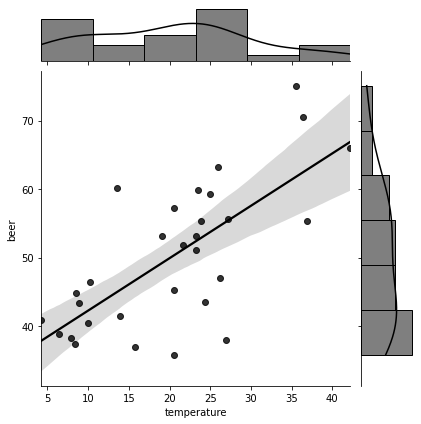

In [38]:
sns.jointplot(x='temperature',y='beer',kind='reg',data=beer,color='k')

In [39]:
# 절대값이 아닌 제곱을 사용하는 이유 >> 로드가 오래걸리지 않는다.

In [40]:
lm_model = smf.ols(formula = "beer ~ temperature", data = beer).fit()

In [41]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           1.11e-05
Time:                        14:14:22   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### OLS Regression 최소자승법 해석

    Dep.Variable > 목표 변수
    Model > 회귀 분석 모델 (여기선: OLS)
    Method > 파라미터 최적화 방법 (OLS >> LS)
    No.Observations > 분석에 사용한 데이터 쌍 개수, 관찰 개수
    Df Residuals > 잔차의 자유도. No.Observations -- 파라미터 수
    Df Model > 모델에서 추정하는 파라미터 수
    R-squared > 결정계수. 선형 모형이 적한한지에 대한 척도. 0.4이상 유의미
    ADj.R-squared > 파라미터 수, 모델에 도움이 되는 데이터에 따라 조정된 결정계수 (수정결정계수)
    F-statistic > 도출된 회귀 식이 적절한지 (0에 가까울수록 적절함)
    Prob(F-statistic) > P_value . 회귀식이 얼마나 유의미한가. 유의계수
    AIC(Akaike Information Criterion) > 관찰 개수와 모델 자체의 복잡성을 기반으로 모델을 평가하는 점수 (낮을수록 좋음)
    BIC(Bayesian Information Criterion) > AIC와 유사하나 패널티항이 더 많기 때문에 AIC보다 성능이 더 좋음 (낮을수록 좋음.)
    
* 일반적으로 R값으로 선형 모델의 적합도를 판단, P_value로 변수끼리 상관관계를 판단.

    Coef > 계수 ( 여기선 Y = temperature * RM - beer )
    std err > 표준 오차
    t > 독립변수, 종속 변수 사이의 관계 
    P > |t| 독립변수의 유의확률. 
    
* 선형 회귀는 특정한 조건(학습 값의 범위 등)에서만 정확한 값을 나타낸다는 것

    Omnibus > 디아고스티노 검정. 비대칭도와 첨도를 결합한 정규성 테스트 (값이 클수록 정규 분포를 따른다)
    Skewness > 왜도. 평균 주위의 잔차들의 대칭 여부, 0에 가까울 수록 대칭
    Kurtosis > 첨도. 잔차들의 분포 모양, 종 모양 일 수록 0에 가까움.
    Durbin-Watson > 더빈 왓슨 정규성 검정. 잔차의 독립성 여부를 판단.(1.5~2.5일 때 잔차들은 독립적 회귀모델을 적합한다. 0 또는 4에 가까울수록 잔차들은 자기상관을 갖고 있어 회귀모델에 부적합하다.
    Jarque-Bera(JB) > 자크 베라 정규성 검정. 값이 클수록 정규 분포의 데이터를 사용.
    Cond. No >  다중공선성 검정. 독립 변숙간 상관관계가 있는지 검정 10이상일 경우 다중공선성 문제가 있다고 판단. 변수가 1개일 때에는 의미가 없다.
    
* 평균에서 멀리 떨어져 있는 데이터를 확이;ㄴ하여 삭제할지를 판단
    
    

In [45]:
null_model = smf.ols('beer ~ 1 ', data = beer).fit()
null_model.aic

227.94194972563105

In [46]:
lm_model = smf.ols('beer ~ temperature', data=beer).fit()
lm_model.aic

208.9090293557544

In [47]:
lm_model.predict()

array([50.3014808 , 53.74590495, 42.26449113, 55.20021737, 46.70397114,
       37.82501112, 44.94348769, 54.51133254, 52.44467805, 41.11634975,
       54.66441806, 49.22988218, 53.21010564, 52.44467805, 41.03980699,
       52.59776357, 45.24965873, 61.78289462, 55.42984564, 50.3014808 ,
       42.41757665, 50.3014808 , 51.14345115, 40.6570932 , 66.91125946,
       52.9039346 , 62.85449324, 41.42252079, 62.47177945, 39.50895182])

In [48]:
# 기온이 0도 일 때 맥주 매상의 기댓값
lm_model.predict(pd.DataFrame({'temperature':[0]}))

0    34.610215
dtype: float64

In [49]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [57]:
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20
print("수식", beta0 + beta1 * temperature)
print("20도일때", lm_model.predict(pd.DataFrame({'temperature':[20]})))

수식 49.91876701095053
20도일때 0    49.918767
dtype: float64


In [58]:
#잔차계산
resid = lm_model.resid
resid.head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [60]:
#잔차 = 실제값 -예측값
y_hat = beta0 + beta1 * beer.temperature  #예측값
(beer.beer - y_hat).head() #실제값

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [62]:
#결정계수 R.squared
mu = np.mean(beer.beer)
y = beer.beer
y_hat = lm_model.predict()

np.sum((y_hat - mu) ** 2) / np.sum((y - mu) ** 2)

0.503959323061188

In [66]:
#수정 결정계수 adj.R.squared
#독립변수의 수가 증가하면 결정계수가 커지는 경향을 조정하기 위해 독립변수가 늘어나는 것에 대하여 퍠널티를 부여
n = len(beer.beer)
s = 1 # 독립변수의 수
1 - ((np.sum(resid ** 2) / (n-s-1)) /(np.sum((y-mu) ** 2) / (n-1)))  

0.48624358459908523

In [69]:
lm_model.rsquared_adj

0.4862435845990851

종속변수의 변동 크기는 모델로 설명 가능한 변동과 설명 못 하는 잔차 제곱합으로 분해할 수 있다.

In [70]:
np.sum( (y - mu) ** 2   )

3277.1146666666655

In [75]:
np.sum ( (y_hat-mu) ** 2)  +  sum(resid **2 )   #모델이 설명 가능한 부분 + 모델이 설명하지 못하는 잔차의 제곱 합

3277.1146666666727

<AxesSubplot:ylabel='Density'>

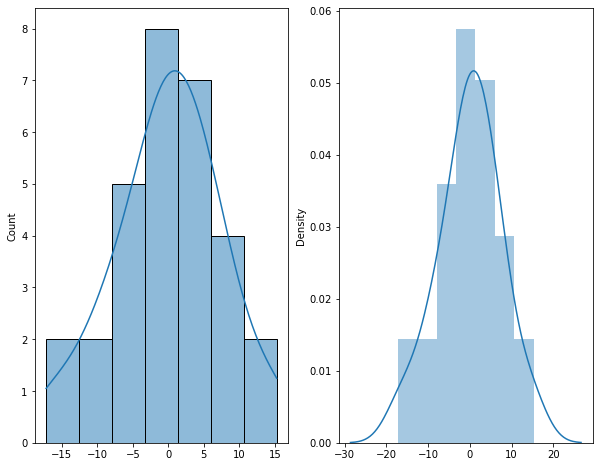

In [92]:
import warnings
warnings.filterwarnings('ignore')
# 잔차 그래프
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.histplot(resid, kde=True,ax=ax1) #count
sns.distplot(resid,ax=ax2) #density

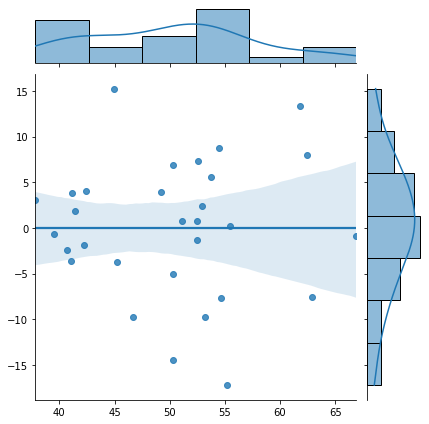

In [96]:
#잔차의 산포도 : x축 적합도, y축 잔차 
sns.jointplot(lm_model.fittedvalues, resid, kind='reg')

In [ ]:
# Q-Q plot : 이론상의 분위점과 